In [1]:
from ggplot import *
import pandas as pd
import numpy as np

/home/ckibet/lustre/miniconda2/envs/moringa/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/ckibet/lustre/miniconda2/envs/moringa/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/ckibet/lustre/miniconda2/envs/moringa/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("./baseball-pitches-clean.csv")
df = df[['pitch_time', 'inning', 'pitcher_name', 'hitter_name', 'pitch_type',
         'sz_top', 'sz_bottom',
         'px', 'pz', 'pitch_name', 'start_speed', 'end_speed', 'type_confidence']]
df.head()

,pitch_time,inning,pitcher_name,hitter_name,pitch_type,sz_top,sz_bottom,px,pz,pitch_name,start_speed,end_speed,type_confidence
0,2013-10-01 20:07:43 -0400,1,Francisco Liriano,Shin-Soo Choo,B,3.10,1.53,0.628,1.547,Fastball,93.2,85.3,0.894
1,2013-10-01 20:07:57 -0400,1,Francisco Liriano,Shin-Soo Choo,S,3.06,1.56,0.545,3.069,Fastball,93.4,85.6,0.895
2,2013-10-01 20:08:12 -0400,1,Francisco Liriano,Shin-Soo Choo,S,3.25,1.53,0.120,1.826,Slider,89.1,82.8,0.931
3,2013-10-01 20:08:31 -0400,1,Francisco Liriano,Shin-Soo Choo,S,3.25,1.53,-0.229,1.667,Slider,90.0,83.3,0.926
4,2013-10-01 20:09:09 -0400,1,Francisco Liriano,Ryan Ludwick,B,3.62,1.78,-1.917,0.438,Slider,87.7,81.6,0.915


## Let's take a look at where pitches wind up

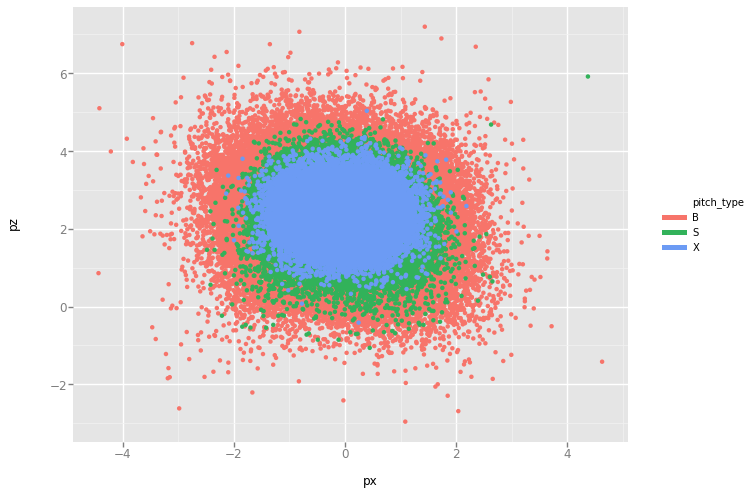

<ggplot: (-9223369104757314139)>

In [4]:
ggplot(aes(x='px', y='pz', color='pitch_type'), data=df) +\
    geom_jitter()

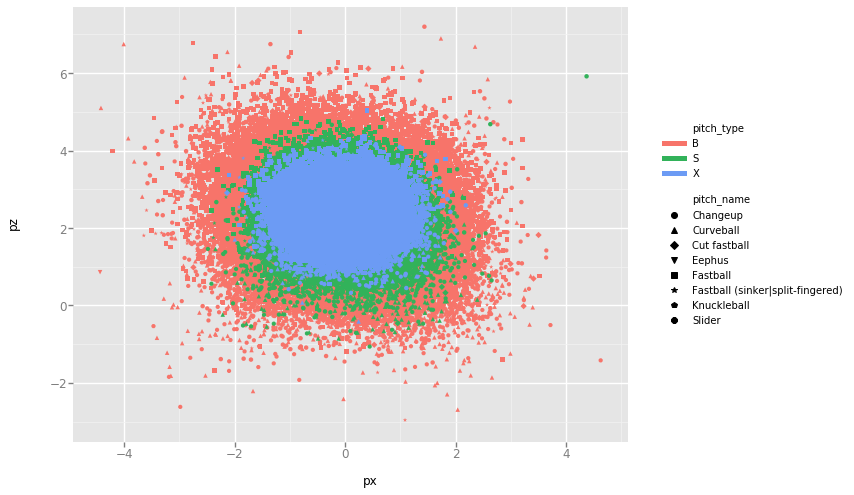

<ggplot: (2932097647224)>

In [5]:
ggplot(aes(x='px', y='pz', color='pitch_type', shape='pitch_name'), data=df) +\
    geom_jitter()

### Let's limit to 1 hitter

In [6]:
df.hitter_name.value_counts().head(10)

Mike Trout          610
Christian Yelich    587
Carlos Santana      581
Matt Carpenter      574
Joey Votto          572
Kyle Seager         560
Shin-Soo Choo       554
Brian Dozier        552
Jayson Werth        550
Evan Longoria       550
Name: hitter_name, dtype: int64

In [7]:
hitter = df[df.hitter_name=='Mike Trout']
hitter.head()

,pitch_time,inning,pitcher_name,hitter_name,pitch_type,sz_top,sz_bottom,px,pz,pitch_name,start_speed,end_speed,type_confidence
3415,2013-09-29 15:11:23 -0400,1,Yu Darvish,Mike Trout,B,3.48,1.57,1.120,1.995,Fastball,92.1,85.9,0.911
3416,2013-09-29 15:11:39 -0400,1,Yu Darvish,Mike Trout,X,3.48,1.59,0.156,2.002,Fastball,92.3,87.4,0.908
3487,2013-09-29 15:54:36 -0400,4,Yu Darvish,Mike Trout,S,3.57,1.61,0.204,1.687,Fastball,91.4,85.1,0.909
3488,2013-09-29 15:54:56 -0400,4,Yu Darvish,Mike Trout,B,3.57,1.74,-2.115,2.987,Fastball,89.7,84.4,0.872
3489,2013-09-29 15:55:21 -0400,4,Yu Darvish,Mike Trout,S,3.64,1.81,0.033,2.472,Fastball (sinker|split-fingered),84.5,80.6,0.936


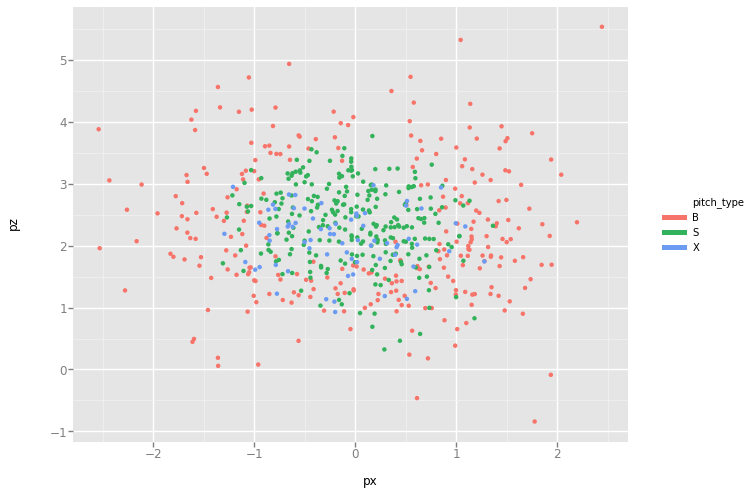

<ggplot: (-9223369104756070859)>

In [8]:
ggplot(aes(x='px', y='pz', color='pitch_type'), data=hitter) +\
    geom_point()

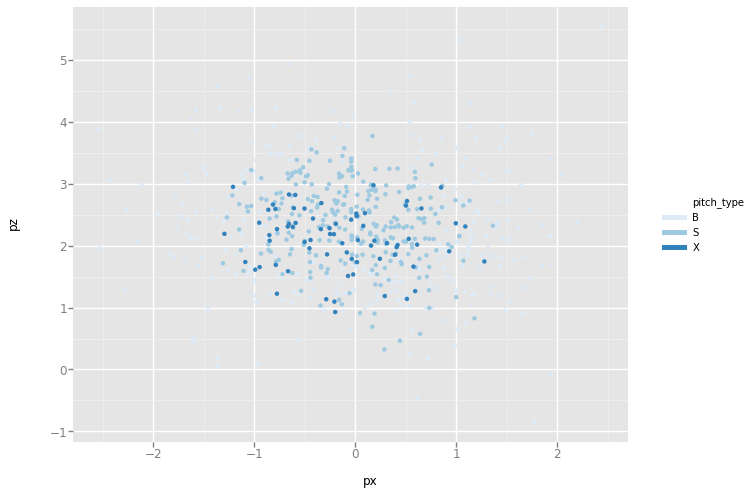

<ggplot: (2932098773270)>

In [9]:
ggplot(aes(x='px', y='pz', color='pitch_type'), data=hitter) +\
    geom_point() +\
    scale_color_brewer()

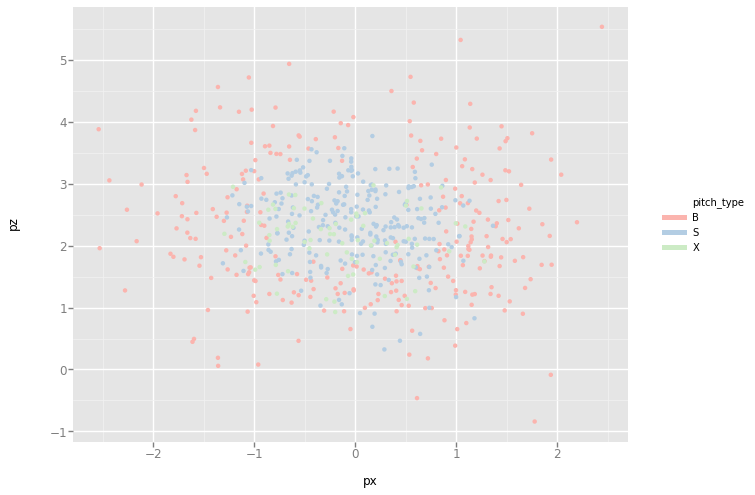

<ggplot: (2932098787960)>

In [10]:
ggplot(aes(x='px', y='pz', color='pitch_type'), data=hitter) +\
    geom_point() +\
    scale_color_brewer(type='qual', palette=4)

TypeError: '>' not supported between instances of 'float' and 'NoneType'

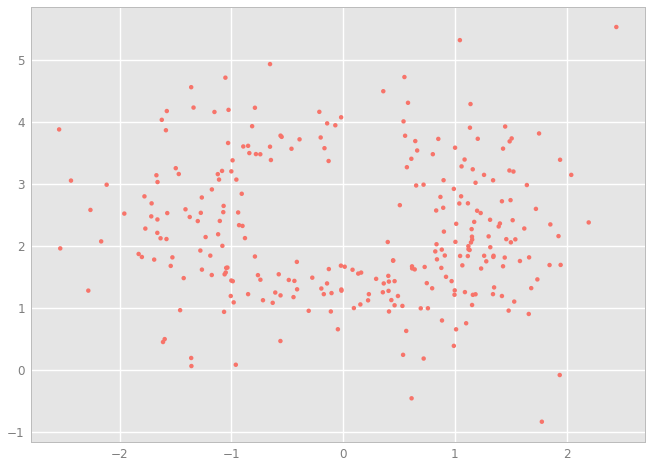

In [11]:
ggplot(aes(x='px', y='pz', color='pitch_type'), data=hitter) +\
    geom_point() +\
    geom_hline(yintercept=[hitter.sz_bottom.mean(), hitter.sz_top.mean()], color='red')

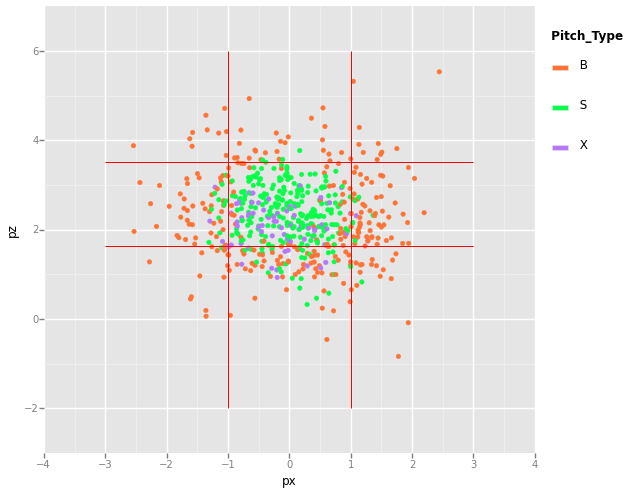

<ggplot: (284822549)>

In [7]:
ggplot(aes(x='px', y='pz', color='pitch_type'), data=hitter) +\
    geom_point() +\
    geom_hline(yintercept=[hitter.sz_bottom.mean(), hitter.sz_top.mean()], color='red') +\
    geom_vline(xintercept=[-1, 1], color='red')

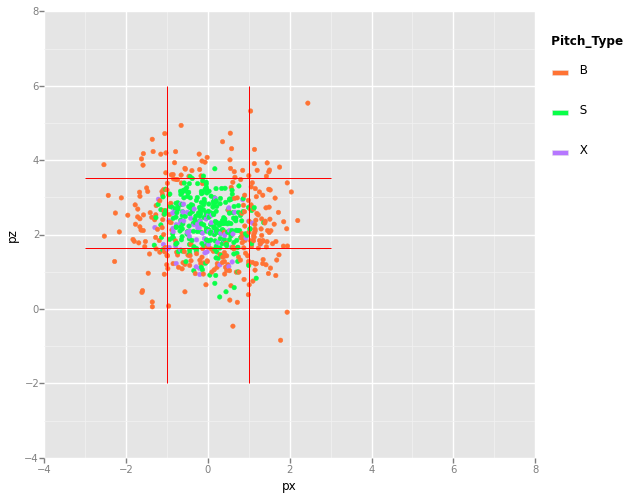

<ggplot: (283370949)>

In [8]:
ggplot(aes(x='px', y='pz', color='pitch_type'), data=hitter) +\
    geom_point() +\
    geom_hline(yintercept=[hitter.sz_bottom.mean(), hitter.sz_top.mean()], color='red') +\
    geom_vline(xintercept=[-1, 1], color='red') +\
    coord_equal()

## How do pitches change speed?

In [12]:
fastballs = df[df.pitch_name=='Fastball']
fastballs.head()

,pitch_time,inning,pitcher_name,hitter_name,pitch_type,sz_top,sz_bottom,px,pz,pitch_name,start_speed,end_speed,type_confidence
0,2013-10-01 20:07:43 -0400,1,Francisco Liriano,Shin-Soo Choo,B,3.10,1.53,0.628,1.547,Fastball,93.2,85.3,0.894
1,2013-10-01 20:07:57 -0400,1,Francisco Liriano,Shin-Soo Choo,S,3.06,1.56,0.545,3.069,Fastball,93.4,85.6,0.895
8,2013-10-01 20:10:57 -0400,1,Francisco Liriano,Joey Votto,X,3.58,1.67,0.614,3.155,Fastball,95.1,87.3,0.920
10,2013-10-01 20:14:30 -0400,1,Johnny Cueto,Starling Marte,S,3.51,1.53,0.366,3.226,Fastball,93.0,85.5,0.948
11,2013-10-01 20:14:45 -0400,1,Johnny Cueto,Starling Marte,X,3.51,1.53,0.371,3.595,Fastball,93.7,86.2,0.947


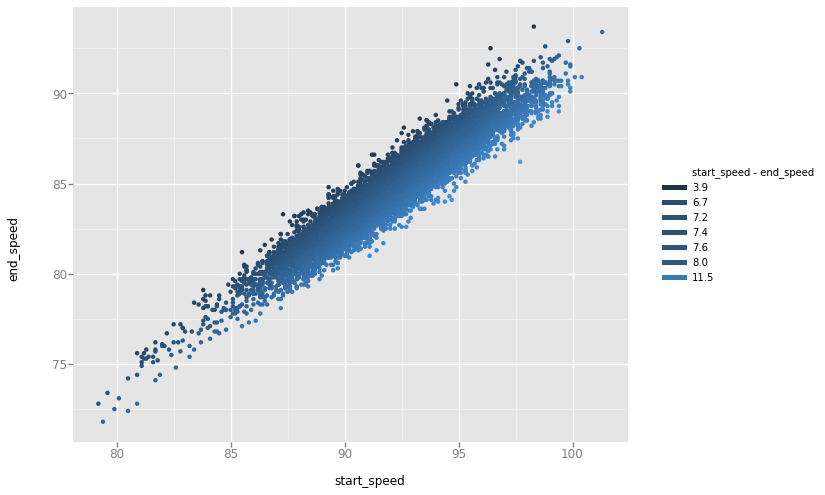

<ggplot: (-9223369104755794751)>

In [13]:
ggplot(aes(x='start_speed', y='end_speed', color='start_speed - end_speed'), data=fastballs.head(10000)) +\
    geom_point() +\
    scale_color_gradient()

In [14]:
ggplot(aes(x='start_speed', y='end_speed', color='start_speed - end_speed'), data=fastballs.head(10000)) +\
    geom_point() +\
    scale_color_gradient(low="blue", high="red") +\
    geom_abline(intercept=10) +\
    coord_equal()

ValueError: RGBA sequence should have length 3 or 4

<ggplot: (-9223369104755728531)>

### Pitch speed as a function of location

How does C.J. Wilson use his pitches?

In [15]:
pitcher = df[df.pitcher_name=="C.J. Wilson"]

In [20]:
ggplot(aes(x='px', y='pz', color='start_speed'), data=pitcher) +\
    geom_point() +\
    scale_color_gradient(low='yellow', high='red') +\
    coord_equal() + \
    xlab("Horizontal Position at Home Plate") +\
    ylab("Vertical Position at Home Plate") +\
    ggtitle("C.J. Wilson Pitch Map") +\
    theme_seaborn()

NameError: name 'theme_seaborn' is not defined

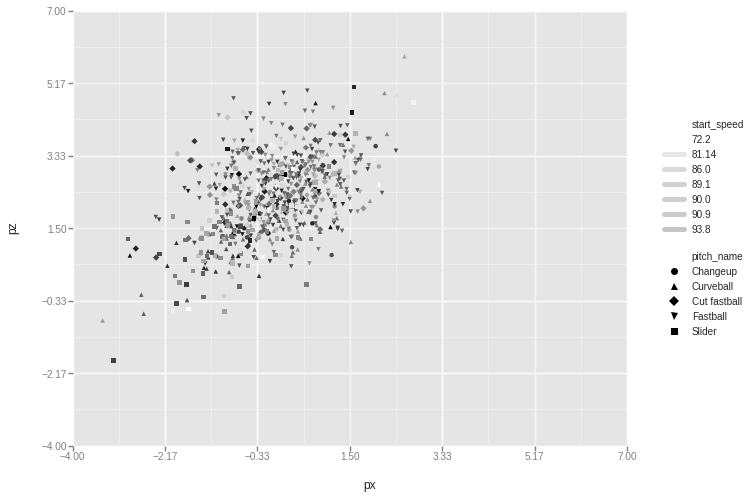

<ggplot: (2932103696185)>

In [25]:
ggplot(aes(x='px', y='pz', color='start_speed', shape='pitch_name'), data=pitcher) +\
    geom_point() +\
    scale_color_gradient(low='white', high='black') +\
    coord_equal()

In [18]:
def normalize_pitch(speed):
    return (speed - speed.min()) / (speed.max() - speed.min())
    
pitcher['pitch_speed_norm'] = pitcher.groupby(["pitcher_name", "pitch_name"]).start_speed.apply(normalize_pitch)

/home/ckibet/lustre/miniconda2/envs/moringa/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


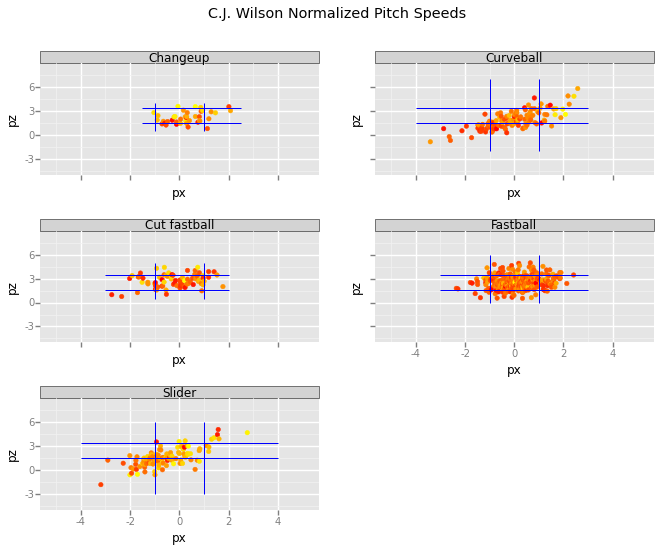

<ggplot: (289434297)>

In [71]:
ggplot(aes(x='px', y='pz', color='pitch_speed_norm'), data=pitcher) +\
    geom_point() +\
    geom_hline(yintercept=[pitcher.sz_bottom.mean(), pitcher.sz_top.mean()], color='blue') +\
    geom_vline(xintercept=[-1, 1], color='blue') +\
    scale_color_gradient(low='yellow', high='red') +\
    facet_wrap("pitch_name", scales="fixed") +\
    ggtitle("C.J. Wilson Normalized Pitch Speeds")

In [21]:
import seaborn as sns

AttributeError: 'AxesSubplot' object has no attribute 'shape'

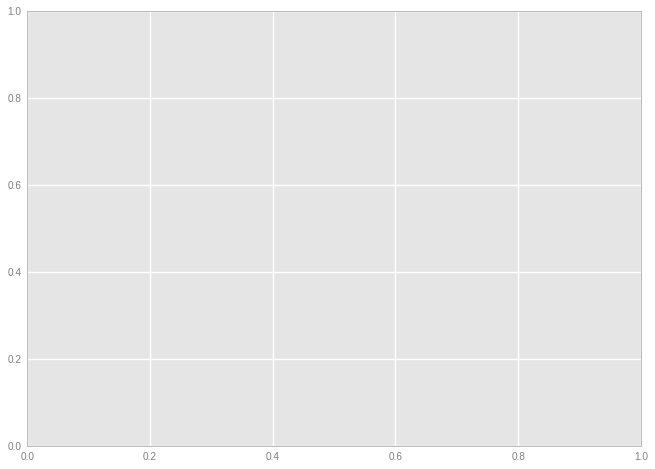

In [23]:

ggplot(aes(x='px', y='pz', color='pitch_speed_norm'), data=pitcher[pitcher.pitch_name=="Slider"]) +\
    geom_point() +\
    geom_hline(yintercept=[pitcher.sz_bottom.mean(), pitcher.sz_top.mean()], color='blue') +\
    geom_vline(xintercept=[-1, 1], color='blue') +\
    scale_color_gradient(low='yellow', high='red') +\
    facet_wrap("pitch_name", scales="fixed")


In [ ]:
theme

### Themes

`ggplot` ships with a few themes that are easy to customize. My favorite is seaborn.

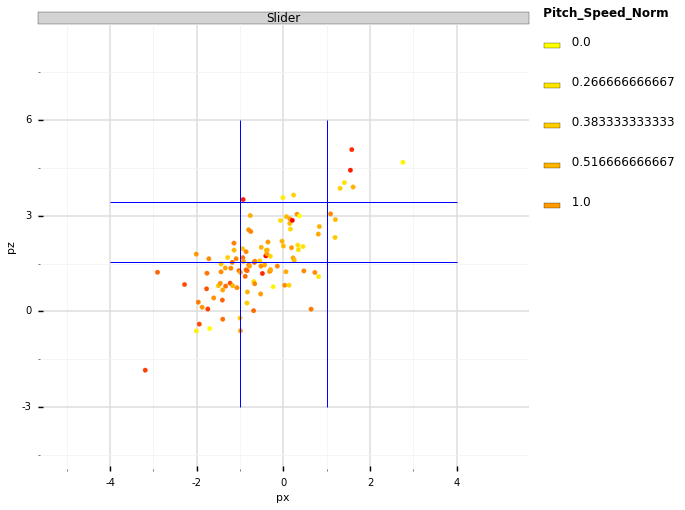

<ggplot: (292445261)>

In [72]:
ggplot(aes(x='px', y='pz', color='pitch_speed_norm'), data=pitcher[pitcher.pitch_name=="Slider"]) +\
    geom_point() +\
    geom_hline(yintercept=[pitcher.sz_bottom.mean(), pitcher.sz_top.mean()], color='blue') +\
    geom_vline(xintercept=[-1, 1], color='blue') +\
    scale_color_gradient(low='yellow', high='red') +\
    facet_wrap("pitch_name", scales="fixed") +\
    theme_seaborn()

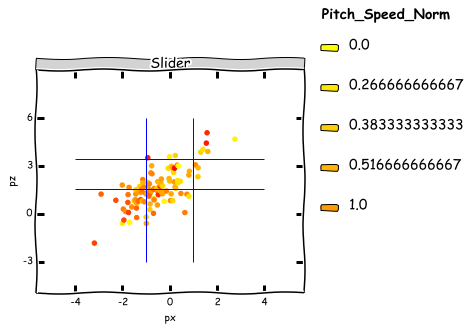

<ggplot: (292401777)>

In [73]:
ggplot(aes(x='px', y='pz', color='pitch_speed_norm'), data=pitcher[pitcher.pitch_name=="Slider"]) +\
    geom_point() +\
    geom_hline(yintercept=[pitcher.sz_bottom.mean(), pitcher.sz_top.mean()], color='blue') +\
    geom_vline(xintercept=[-1, 1], color='blue') +\
    scale_color_gradient(low='yellow', high='red') +\
    facet_wrap("pitch_name", scales="fixed") +\
    theme_xkcd()

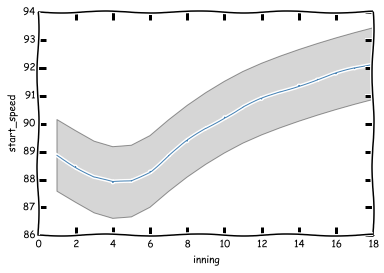

<ggplot: (294730413)>

In [78]:
ggplot(aes(x='inning', y='start_speed'), data=df) + stat_smooth(color='steelblue') + theme_xkcd()